# From https://www.kaggle.com/code/xvivancos/market-basket-analysis

### Load data into dataframe


In [1]:
# Load libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the data
df = pd.read_csv("D:/Document/Data_Analysis/DataSet/BreadBasket_DMS.csv")
df.head(20)

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
5,10/30/2016,10:07:57,3,Cookies
6,10/30/2016,10:08:41,4,Muffin
7,10/30/2016,10:13:03,5,Coffee
8,10/30/2016,10:13:03,5,Pastry
9,10/30/2016,10:13:03,5,Bread


## Data preprocessing


In [3]:
#Remove none and "" row
df3  =df[df["Item"].notna() & (df["Item"] != "")]
df3

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


In [7]:
df3[df3.duplicated()]

,Date,Time,Transaction,Item
2,10/30/2016,10:05:34,2,Scandinavian
25,10/30/2016,10:27:21,11,Bread
39,10/30/2016,10:34:36,15,NONE
52,10/30/2016,10:49:29,21,Coffee
107,10/30/2016,12:23:01,49,Coffee
...,...,...,...,...
21173,4/8/2017,15:04:45,9618,Cake
21187,4/8/2017,16:05:07,9627,Coffee
21206,4/8/2017,16:30:32,9634,Coffee
21248,4/9/2017,11:40:10,9664,Coffee


In [23]:
# Convert to transactions and  change to list plus remove duplicate item
#transactions = df.groupby("Transaction")["Item"].apply(lambda x: list(set(x))).tolist()


transactions = (
    df.groupby("Transaction")["Item"] #Convert into 
      .apply(lambda x: list(dict.fromkeys(x)))  # remove duplicates, keep order
      .tolist()
)


In [28]:
#Remove duplicate transaction
transactions1 = [list(t) for t in dict.fromkeys(tuple(t) for t in transactions)]



In [39]:
#Encode with one hot method
te = TransactionEncoder()
te_ary = te.fit(transactions1).transform(transactions1)
trans = pd.DataFrame(te_ary, columns=te.columns_)

In [49]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(2747, 95))

C:\Users\ANM\AppData\Local\Temp\ipykernel_27392\1641763122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


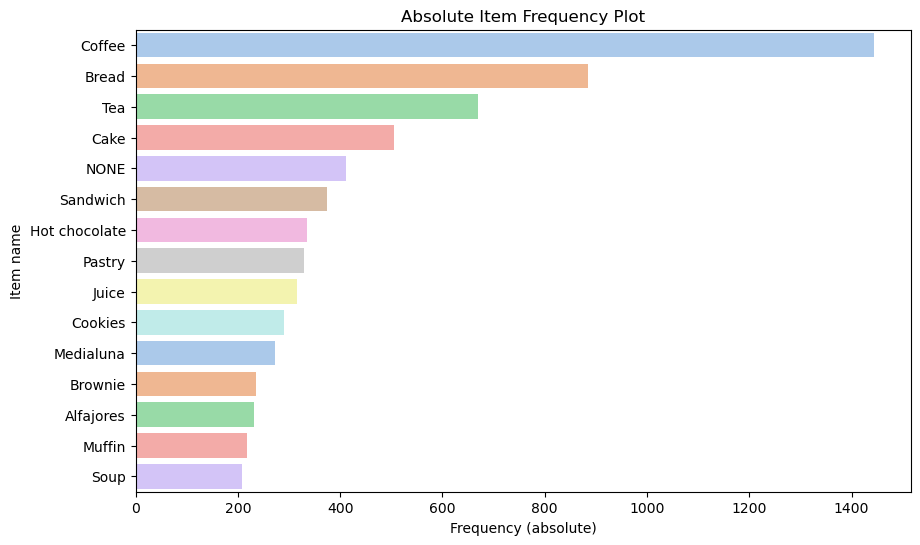

In [42]:
#See the count of first 15 items
import matplotlib.pyplot as plt
import seaborn as sns

# Get item frequencies (sum of True/False per column)
item_freq = trans.sum().sort_values(ascending=False)

# Plot top 15 items
plt.figure(figsize=(10,6))
sns.barplot(
    x=item_freq.values[:15],
    y=item_freq.index[:15],
    palette="pastel"
)
plt.xlabel("Frequency (absolute)")
plt.ylabel("Item name")
plt.title("Absolute Item Frequency Plot")
plt.show()

In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Support and confidence values
support_levels = [0.1, 0.05, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Empty lists to store number of rules
rules_sup10 = []
rules_sup5 = []
rules_sup1 = []
rules_sup05 = []

# Loop for support = 0.1
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[0], use_colnames=True)
    rules1 = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup10.append(len(rules1))

# Loop for support = 0.05
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup5.append(len(rules))

# Loop for support = 0.01
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup1.append(len(rules))

# Loop for support = 0.005
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup05.append(len(rules))


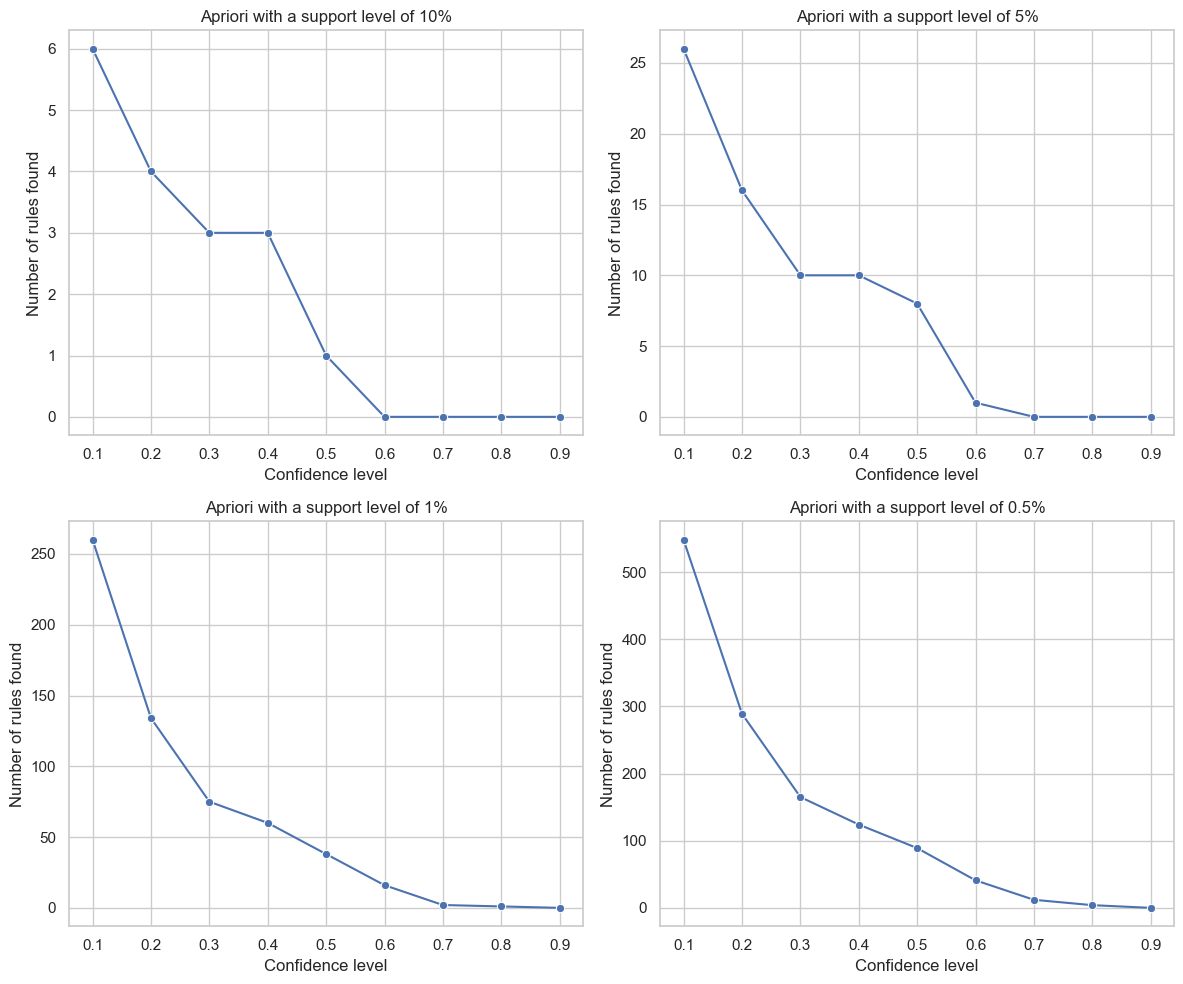

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure and axes (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1 — Support 10%
sns.lineplot(x=confidence_levels, y=rules_sup10, marker="o", ax=axs[0,0])
axs[0,0].set_title("Apriori with a support level of 10%")
axs[0,0].set_xlabel("Confidence level")
axs[0,0].set_ylabel("Number of rules found")

# Plot 2 — Support 5%
sns.lineplot(x=confidence_levels, y=rules_sup5, marker="o", ax=axs[0,1])
axs[0,1].set_title("Apriori with a support level of 5%")
axs[0,1].set_xlabel("Confidence level")
axs[0,1].set_ylabel("Number of rules found")
#axs[0,1].set_yticks(range(0, 11, 2))

# Plot 3 — Support 1%
sns.lineplot(x=confidence_levels, y=rules_sup1, marker="o", ax=axs[1,0])
axs[1,0].set_title("Apriori with a support level of 1%")
axs[1,0].set_xlabel("Confidence level")
axs[1,0].set_ylabel("Number of rules found")
#axs[1,0].set_yticks(range(0, 51, 10))

# Plot 4 — Support 0.5%
sns.lineplot(x=confidence_levels, y=rules_sup05, marker="o", ax=axs[1,1])
axs[1,1].set_title("Apriori with a support level of 0.5%")
axs[1,1].set_xlabel("Confidence level")
axs[1,1].set_ylabel("Number of rules found")
#axs[1,1].set_yticks(range(0, 130, 20))

# Adjust layout
plt.tight_layout()
plt.show()


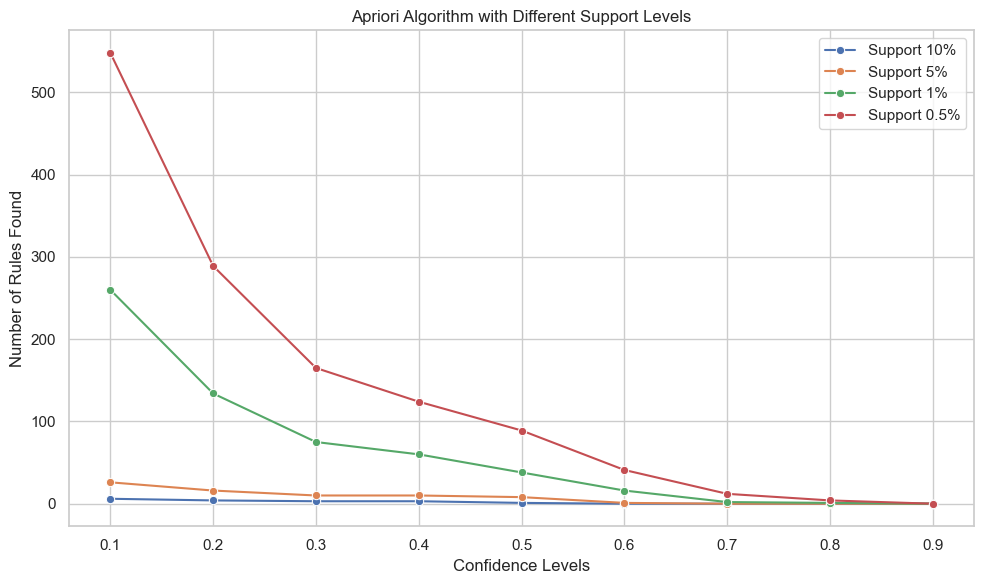

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# Example Data (replace with your real data)
# --------------------------
# confidenceLevels = [0.1, 0.2, 0.3, 0.4, 0.5]
# rules_sup10 = [100, 80, 60, 40, 20]
# rules_sup5  = [150, 120, 90, 60, 30]
# rules_sup1  = [250, 200, 150, 100, 50]
# rules_sup05 = [300, 250, 200, 150, 100]

# --------------------------
# Convert to long-format DataFrame (like ggplot expects)
# --------------------------
df = pd.DataFrame({
    "Confidence": confidence_levels,
    "Support 10%": rules_sup10,
    "Support 5%": rules_sup5,
    "Support 1%": rules_sup1,
    "Support 0.5%": rules_sup05
})

# Melt to long format for Seaborn
df_melt = df.melt(id_vars="Confidence", 
                  var_name="Support Level", 
                  value_name="Number of Rules")

# --------------------------
# Plot
# --------------------------
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melt, x="Confidence", y="Number of Rules", hue="Support Level", marker="o")

plt.title("Apriori Algorithm with Different Support Levels")
plt.xlabel("Confidence Levels")
plt.ylabel("Number of Rules Found")
plt.legend(title="")  # removes legend title like theme(legend.title=element_blank())
plt.tight_layout()
plt.show()


In [52]:
freq_items = apriori(trans, min_support=support_levels[0], use_colnames=True)
rules1 = association_rules(freq_items, metric="confidence", min_threshold=conf)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Coffee),0.321806,0.525300,0.148526,0.461538,0.878618,1.0,-0.020519,0.881585,-0.169231,0.212611,-0.134320,0.372141
1,(Coffee),(Bread),0.525300,0.321806,0.148526,0.282744,0.878618,1.0,-0.020519,0.945541,-0.225423,0.212611,-0.057596,0.372141
2,(Coffee),(Cake),0.525300,0.183837,0.101565,0.193347,1.051732,1.0,0.004996,1.011790,0.103618,0.167166,0.011652,0.372911
3,(Cake),(Coffee),0.183837,0.525300,0.101565,0.552475,1.051732,1.0,0.004996,1.060723,0.060267,0.167166,0.057247,0.372911
4,(Coffee),(Tea),0.525300,0.243902,0.104478,0.198891,0.815454,1.0,-0.023644,0.943814,-0.322835,0.157174,-0.059531,0.313625
5,(Tea),(Coffee),0.243902,0.525300,0.104478,0.428358,0.815454,1.0,-0.023644,0.830415,-0.230363,0.157174,-0.204218,0.313625


In [53]:
from mlxtend.frequent_patterns import fpmax

freq_item=fpmax(trans,min_support=support_levels[0], use_colnames=True)
rules2 = association_rules(freq_items, metric="confidence", min_threshold=conf)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Coffee),0.321806,0.525300,0.148526,0.461538,0.878618,1.0,-0.020519,0.881585,-0.169231,0.212611,-0.134320,0.372141
1,(Coffee),(Bread),0.525300,0.321806,0.148526,0.282744,0.878618,1.0,-0.020519,0.945541,-0.225423,0.212611,-0.057596,0.372141
2,(Coffee),(Cake),0.525300,0.183837,0.101565,0.193347,1.051732,1.0,0.004996,1.011790,0.103618,0.167166,0.011652,0.372911
3,(Cake),(Coffee),0.183837,0.525300,0.101565,0.552475,1.051732,1.0,0.004996,1.060723,0.060267,0.167166,0.057247,0.372911
4,(Coffee),(Tea),0.525300,0.243902,0.104478,0.198891,0.815454,1.0,-0.023644,0.943814,-0.322835,0.157174,-0.059531,0.313625
5,(Tea),(Coffee),0.243902,0.525300,0.104478,0.428358,0.815454,1.0,-0.023644,0.830415,-0.230363,0.157174,-0.204218,0.313625


In [57]:
from mlxtend.frequent_patterns import fpgrowth

freq_item=fpgrowth(trans,min_support=support_levels[0], use_colnames=True)
rules2 = association_rules(freq_items, metric="confidence", min_threshold=conf)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Coffee),0.321806,0.525300,0.148526,0.461538,0.878618,1.0,-0.020519,0.881585,-0.169231,0.212611,-0.134320,0.372141
1,(Coffee),(Bread),0.525300,0.321806,0.148526,0.282744,0.878618,1.0,-0.020519,0.945541,-0.225423,0.212611,-0.057596,0.372141
2,(Coffee),(Cake),0.525300,0.183837,0.101565,0.193347,1.051732,1.0,0.004996,1.011790,0.103618,0.167166,0.011652,0.372911
3,(Cake),(Coffee),0.183837,0.525300,0.101565,0.552475,1.051732,1.0,0.004996,1.060723,0.060267,0.167166,0.057247,0.372911
4,(Coffee),(Tea),0.525300,0.243902,0.104478,0.198891,0.815454,1.0,-0.023644,0.943814,-0.322835,0.157174,-0.059531,0.313625
5,(Tea),(Coffee),0.243902,0.525300,0.104478,0.428358,0.815454,1.0,-0.023644,0.830415,-0.230363,0.157174,-0.204218,0.313625
